In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

# Data Generation

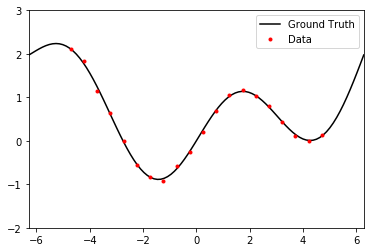

In [2]:
def f3(x):
    return np.sin(x) + 0.05*x**2

x = np.linspace(-2*np.pi,2*np.pi,100)
y = f3(x)

n = 20
x_data = np.linspace(-1.5*np.pi,1.5*np.pi,n)
y_data = f3(x_data) + 0.05*np.random.randn(n)

plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])
plt.show()

# Gaussian Process Regression

### Kernel

$k(x_{i},x_{j}) = \beta \exp(-0.5\lambda^{-1}(x_{i}-x_{j})^{2})$

### Posterior mean and covariance

$y_{*} = k_{*}^{t}(K + \sigma I)^{-1}Y$

$Var(y_{*}) = k_{**} - k_{*}^{t}(K + \sigma I)^{-1}k_{*}$

### Define kernel parameter and placeholder

In [3]:
tf.reset_default_graph()

inv_lambda = 4e0
beta = 1e0
sigma = 1e-4

x_ph = tf.placeholder(tf.float32,shape=(None,1))
y_ph = tf.placeholder(tf.float32,shape=(None,1))
x_star_ph = tf.placeholder(tf.float32,shape=(None,1))

inv_lambda_ph = tf.placeholder(tf.float32,shape=())
beta_ph = tf.placeholder(tf.float32,shape=())
sigma_ph = tf.placeholder(tf.float32,shape=())

### Define GPR
$X^2 - 2XX^{t} + X^2$

In [4]:
x_norm = 
x_norm = 

squared_dist_XX =
K_XX =

x_star_norm =
x_star_norm =

squared_dist_XstarX = 
K_XstarX =

mean_y =

y_pred = tf.matmul(K_XstarX,tf.matmul(tf.linalg.inv(K_XX + sigma_ph*tf.identity(K_XX)),y_ph))
std_pred = tf.sqrt(beta-tf.diag_part(tf.matmul(K_XstarX,tf.matmul(tf.linalg.inv(K_XX + sigma_ph*tf.identity(K_XX)),tf.transpose(K_XstarX)))))

### GPR

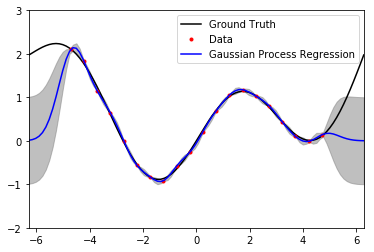

In [5]:
sess = tf.Session()

feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],
             inv_lambda_ph:inv_lambda,beta_ph:beta,sigma_ph:sigma}
y_pred_np,std_pred_np = sess.run([y_pred,std_pred],feed_dict=feed_dict)

plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np.flatten()-std_pred_np, y_pred_np.flatten()+std_pred_np, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])
plt.show()

### Effect of Scale Parameter $\lambda^{-1}$

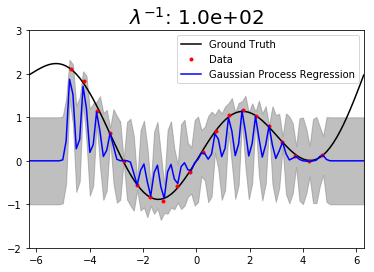

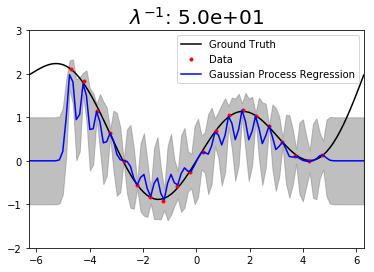

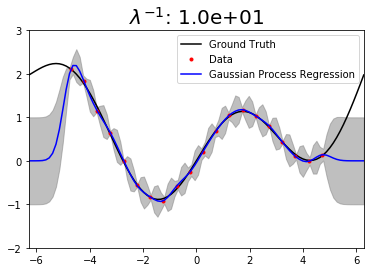

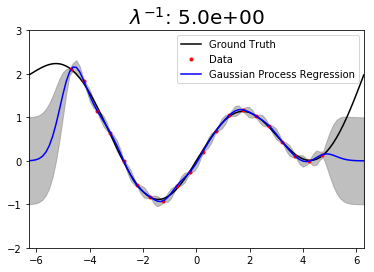

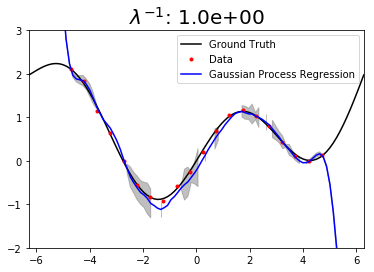

In [6]:
inv_lambda1 = 
inv_lambda2 = 
inv_lambda3 = 
inv_lambda4 = 5e0
inv_lambda5 = 


feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],inv_lambda_ph:inv_lambda1,beta_ph:beta,sigma_ph:sigma}
y_pred_np1,std_pred_np1 = sess.run([y_pred,std_pred],feed_dict=feed_dict)

feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],inv_lambda_ph:inv_lambda2,beta_ph:beta,sigma_ph:sigma}
y_pred_np2,std_pred_np2 = sess.run([y_pred,std_pred],feed_dict=feed_dict)

feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],inv_lambda_ph:inv_lambda3,beta_ph:beta,sigma_ph:sigma}
y_pred_np3,std_pred_np3 = sess.run([y_pred,std_pred],feed_dict=feed_dict)

feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],inv_lambda_ph:inv_lambda4,beta_ph:beta,sigma_ph:sigma}
y_pred_np4,std_pred_np4 = sess.run([y_pred,std_pred],feed_dict=feed_dict)

feed_dict = {x_star_ph:x[:,np.newaxis],x_ph:x_data[:,np.newaxis],y_ph:y_data[:,np.newaxis],inv_lambda_ph:inv_lambda5,beta_ph:beta,sigma_ph:sigma}
y_pred_np5,std_pred_np5 = sess.run([y_pred,std_pred],feed_dict=feed_dict)

plt.figure()
plt.title('$\lambda^{-1}$'+': {:.01e}'.format(inv_lambda1),{'fontsize':20})
plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np1,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np1.flatten()-std_pred_np1, y_pred_np1.flatten()+std_pred_np1, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])

plt.figure()
plt.title('$\lambda^{-1}$'+': {:.01e}'.format(inv_lambda2),{'fontsize':20})
plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np2,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np2.flatten()-std_pred_np2, y_pred_np2.flatten()+std_pred_np2, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])

plt.figure()
plt.title('$\lambda^{-1}$'+': {:.01e}'.format(inv_lambda3),{'fontsize':20})
plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np3,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np3.flatten()-std_pred_np3, y_pred_np3.flatten()+std_pred_np3, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])

plt.figure()
plt.title('$\lambda^{-1}$'+': {:.01e}'.format(inv_lambda4),{'fontsize':20})
plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np4,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np4.flatten()-std_pred_np4, y_pred_np4.flatten()+std_pred_np4, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])

plt.figure()
plt.title('$\lambda^{-1}$'+': {:.01e}'.format(inv_lambda5),{'fontsize':20})
plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_np5,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_np5.flatten()-std_pred_np5, y_pred_np5.flatten()+std_pred_np5, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])

plt.show()

# What is the best hyperparameter of GPR??

### We can optimize the hyperparameter using sklearn package

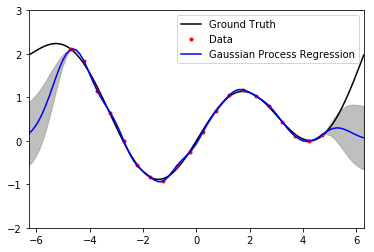

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(x_data[:,np.newaxis], y_data[:,np.newaxis])

y_pred_sk, std_pred_sk = gp.predict(x[:,np.newaxis], return_std=True)

plt.plot(x,y,"k-",label="Ground Truth")
plt.plot(x_data,y_data,"r.",label="Data")
plt.plot(x,y_pred_sk,"b-",label="Gaussian Process Regression")
plt.fill_between(x, y_pred_sk.flatten()-std_pred_sk, y_pred_sk.flatten()+std_pred_sk, color='grey', alpha='0.5')
plt.legend()
plt.xlim([-2*np.pi,2*np.pi])
plt.ylim([-2,3])
plt.show()

# Program your own example!

In [8]:
# Generate data 

# Define gpr kernel

# Fit kernel hyperparameter

# Prediction and draw!